# Heat Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## General Solution

$$
\frac{\partial u}{\partial t} = \alpha^2 \frac{\partial^2 u}{\partial x^2}
$$

## Numerical Stability

$$
\Delta t \leq \frac{(\Delta x)^2}{2 \alpha^2}
$$

## Forward Difference Method

In [20]:
def heat1D(alpha,u0,tf,Nx=101,Nt=10001):
    dx = 1/(Nx - 1)
    dt = tf/(Nt - 1)
    if dt > dx**2/(2*alpha):
        print("Numerically unstable.")
        return None
    x = np.linspace(0,1,Nx)
    t = np.linspace(0,tf,Nt);
    u = np.zeros((Nx, Nt))
    u[:,0] = u0(x)
    D = np.zeros((Nx, Nx))
    D[0,0] = 1.0
    D[Nx - 1,Nx - 1] = 1.0
    C = alpha*dt/dx**2
    for i in range(1,Nx - 1):
        D[i,i - 1] = C
        D[i,i] = 1 - 2*C
        D[i,i + 1] =  C
    for n in range(0,Nt - 1):
        u[:,n+1] = D@u[:,n]
    return u

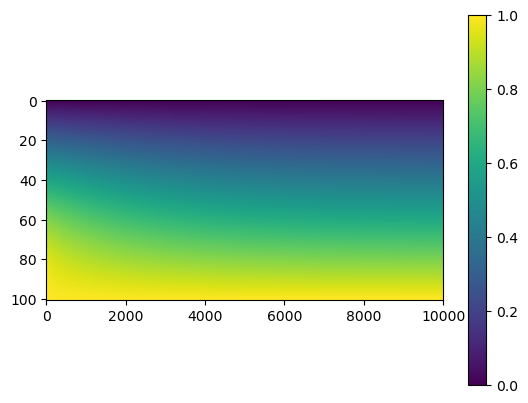

In [21]:
alpha = 0.2
tf = 2.0
u0 = lambda x: np.sin(np.pi*x/2)
U = heat1D(alpha,u0,tf)
plt.imshow(U,aspect=50), plt.colorbar()
plt.show()

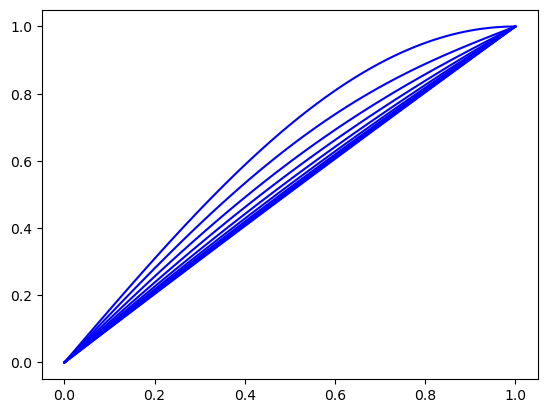

In [22]:
N = 10
k = U.shape[1]//N
x = np.linspace(0,1,U.shape[0])
for n in range(N):
    plt.plot(x,U[:,n*k],'b')
plt.show()

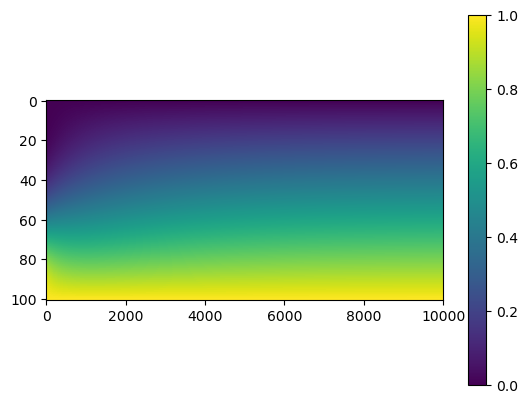

In [24]:
alpha = 0.2
tf = 2.0
u0 = lambda x: np.sin(np.pi*x/2)**4
U = heat1D(alpha,u0,tf)
plt.imshow(U,aspect=50), plt.colorbar()
plt.show()

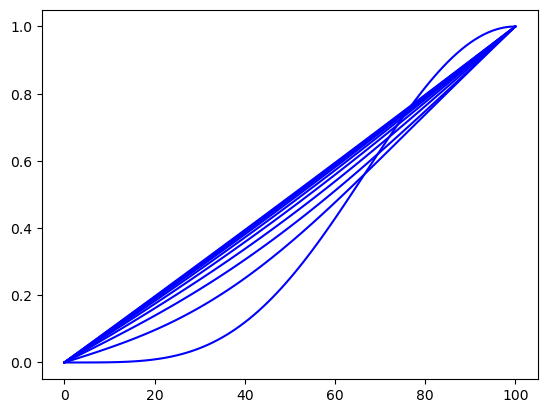

In [26]:
N = 10
k = U.shape[1]//N
x = np.linspace(0,1,U.shape[0])
for n in range(N):
    plt.plot(U[:,n*k],'b')
plt.show()